# 💎 Introduction to Diamonds 💎

Diamonds are one of the most precious and sought-after gemstones in the world. They are formed deep within the Earth's mantle under high pressure and high temperature conditions. The diamond industry is heavily regulated by organizations such as the Gemological Institute of America (GIA) to ensure the authenticity and quality of diamonds.

![title](/Users/sagarsaccount/code/SagarDaryanani/ML_diamonds_folder/anatomy_of_a_diamond.webp)


## The 4Cs 

The value and quality of a diamond are determined by the 4Cs: cut, color, clarity, and carat weight.

### Cut 💎

The cut of a diamond refers to the angles and proportions of a diamond. A well-cut diamond will reflect light from one facet to another and disperse it through the top of the stone, creating a beautiful sparkle. The cut is graded on a scale from Excellent to Poor.

**Cut Grading**:
- Excellent
- Very Good
- Good
- Fair
- Poor

### Color 🌈

The color of a diamond is determined by the presence of impurities and the amount of nitrogen present in the stone. Diamonds with less color are more valuable, and the color is graded on a scale from D (colorless) to Z (light yellow or brown).

**Color Grading**:
- D: Colorless
- E: Near colorless
- F: Slightly colored
- G: Nearly colored
- H: Colored
- I: Slightly colored
- J: Colored
- K-M: Highly colored
- N-Z: Lightly colored

### Clarity 🔍

The clarity of a diamond refers to the presence of blemishes and inclusions (internal flaws) in the stone. Diamonds with fewer blemishes and inclusions are more valuable and are graded on a scale from Flawless to Included.

**Clarity Grading**:
- Flawless (FL)
- Internally Flawless (IF)
- Very, Very Slightly Included (VVS1 and VVS2)
- Very Slightly Included (VS1 and VS2)
- Slightly Included (SI1 and SI2)
- Included (I1, I2, and I3)



### Carat ⚖️

The carat weight of a diamond refers to the weight of the stone. A larger diamond is generally more valuable than a smaller diamond.

**Carat Weight**:
- 0.5 carat: lower price per carat due to increased supply at this weight range
- 1 carat: the most popular weight range and typically commands a higher price per carat
- 1.5 carats: still popular and often more expensive than 1 carat stones
- 2 carats: highly sought after and typically expensive
- 2.5 carats and above: rare and expensive, with price per carat increasing significantly with size

Overall, understanding the 4Cs is essential in evaluating and comparing the quality and value of a diamond.

--------------------------------------------------------------


### The Content 📚
**Price**: in US dollars (\$326--\$18,823)

**Carat**: 0.2--5.01

**Cut**: Fair, Good, Very Good, Premium, Ideal

**Color**: J (worst) to D (best) 

**Clarity**: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

**x**: length in mm (0--10.74)

**y**: width in mm (0--58.9)

**z**: depth in mm (0--31.8)

**Depth** percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**Table**: Width of top of diamond relative to widest point (43--95)

In [159]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
dia=pd.read_csv('Diamonds Prices2022 2.csv')
dia.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [107]:
dia.nunique()

Unnamed: 0    53943
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

## 1 Exploratory Analysis
### 1.1 Distribution 
#### First thing we should do is understand the price and carat distribution of the diamonds 

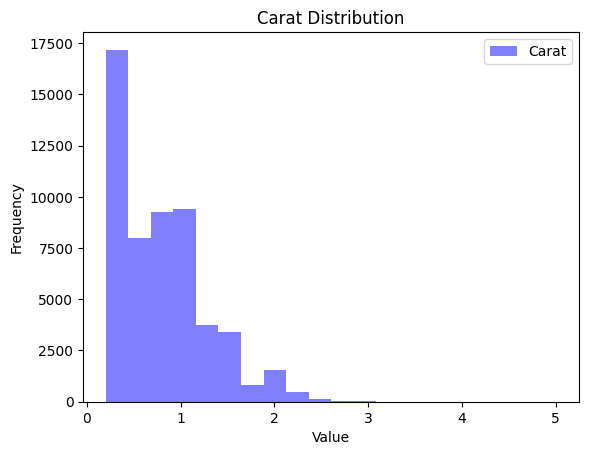

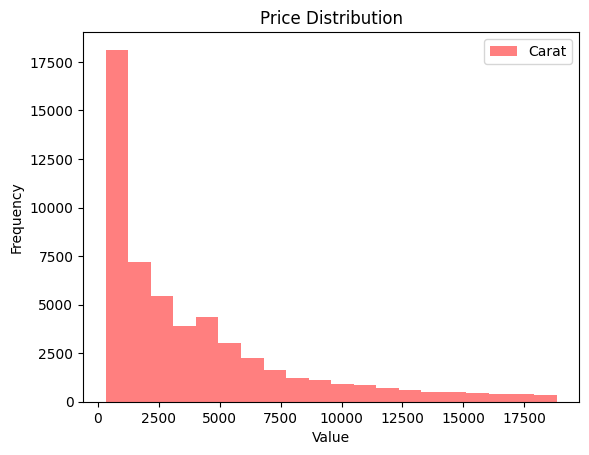

In [11]:
# plot a histogram of carat
plt.hist(dia['carat'], bins=20, alpha=0.5, color='blue', label='Carat')

# add a legend
plt.legend(loc='upper right')

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Carat Distribution')

# show the plot
plt.show()


# plot a histogram of price
plt.hist(dia['price'], bins=20, alpha=0.5, color='red', label='Carat')

# add a legend
plt.legend(loc='upper right')

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Price Distribution')

# show the plot
plt.show()

We see that the frequency of diamonds available in the dataset are in the lower range of price and carat. These graphs also suggest that the larger the carat, the higher the price, however we have to perform other tests to confirm this. 

-------------------------------

### 1.2 Categorical Variables Distribution
#### We need to also vizualize the categorical variables

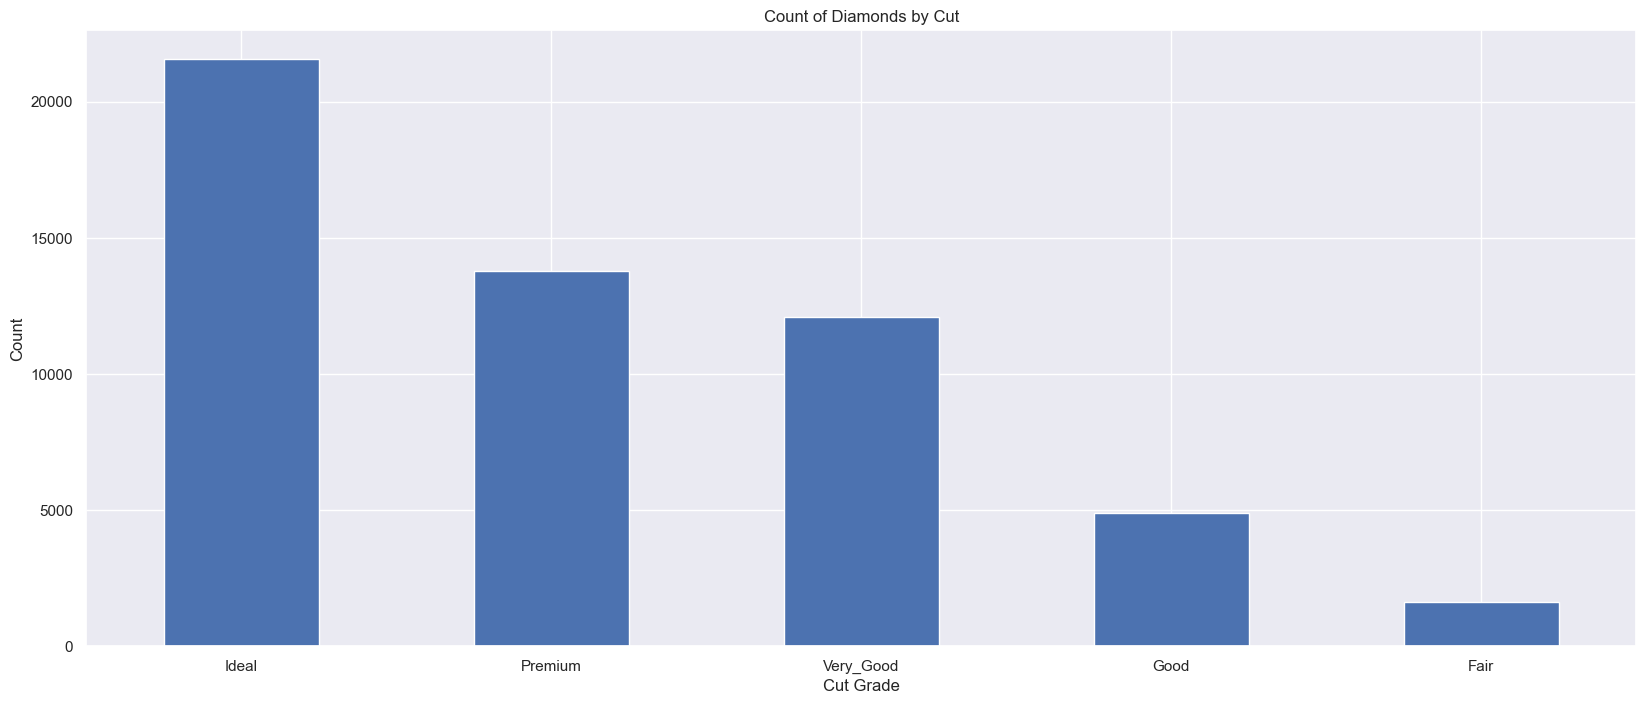

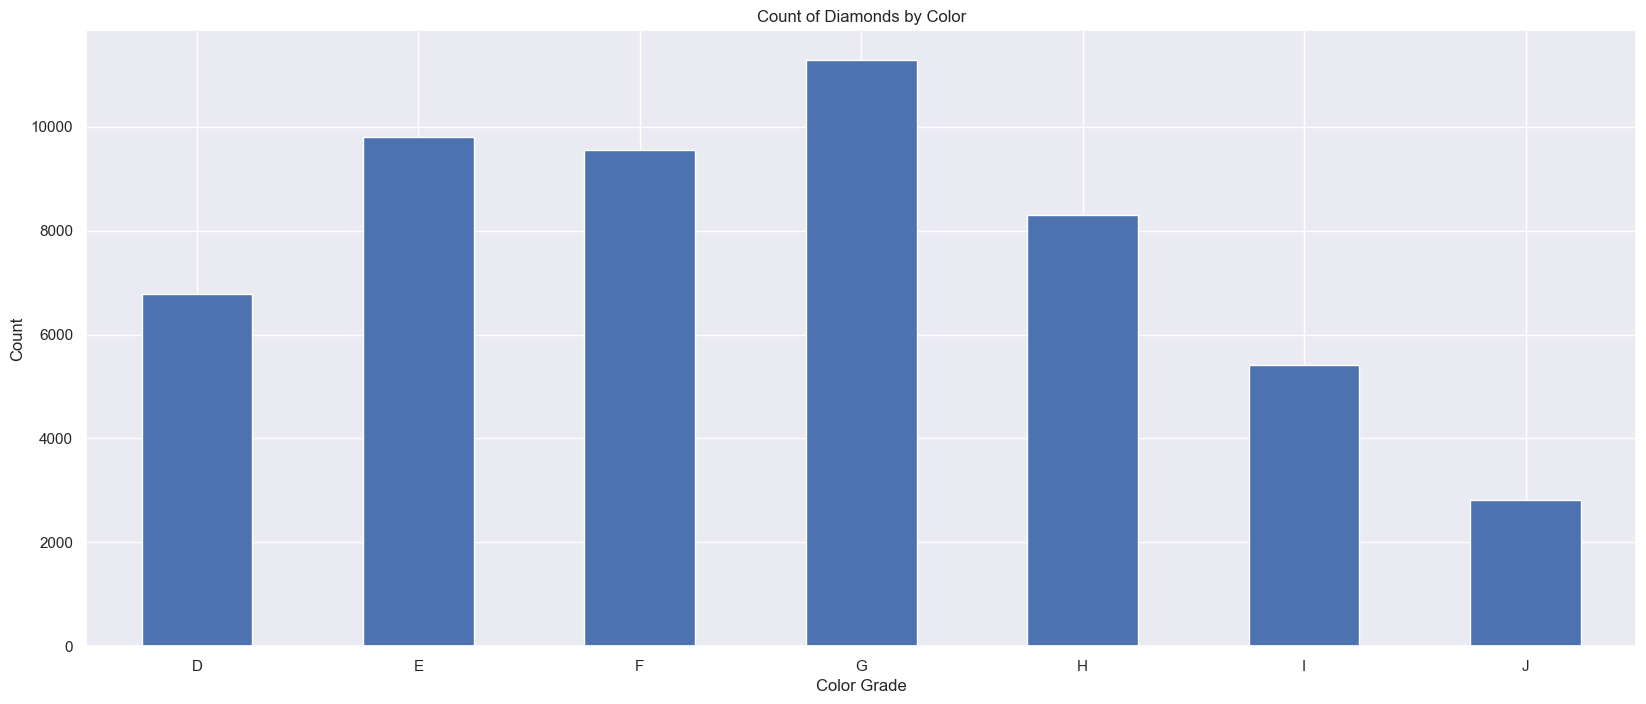

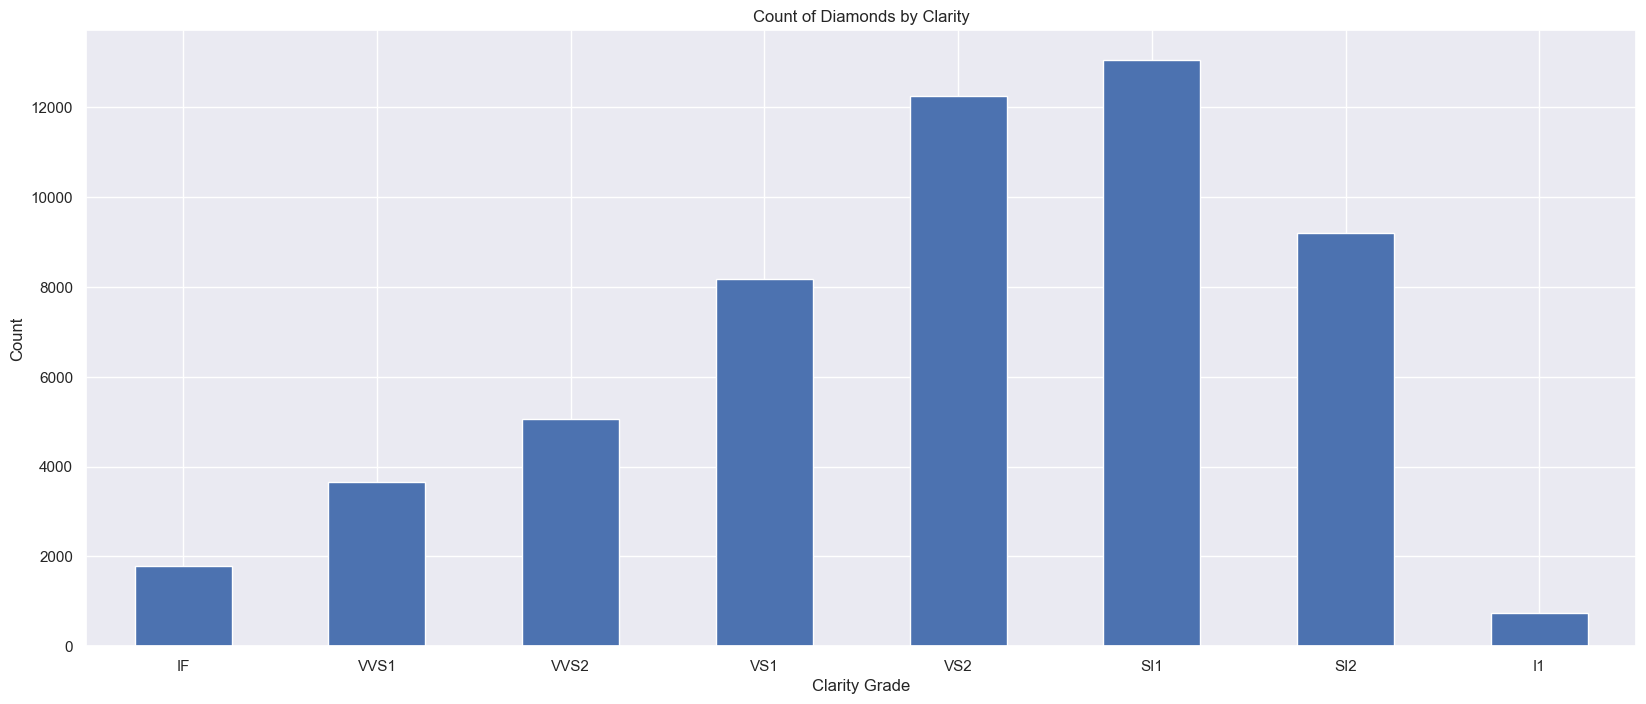

In [79]:
cut_order=['Ideal','Premium','Very_Good','Good','Fair']


# Get the count of each unique value for the 'cut' column
cut_counts = dia['cut'].value_counts().loc[cut_order]

# Plot the result
cut_counts.plot.bar()
plt.title('Count of Diamonds by Cut')
plt.xlabel('Cut Grade')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

# Define the desired order of categories
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

# Get the count of each unique value for the 'color' column, ordered by the defined order
color_counts = dia['color'].value_counts().loc[color_order]

# Plot the result
color_counts.plot.bar()
plt.title('Count of Diamonds by Color')
plt.xlabel('Color Grade')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

# Define the desired order of categories
clarity_order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']

# Get the count of each unique value for the 'cut' column
clarity_counts = dia['clarity'].value_counts().loc[clarity_order]

# Plot the result
clarity_counts.plot.bar()
plt.title('Count of Diamonds by Clarity')
plt.xlabel('Clarity Grade')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

#### What we see:
#### - Cut: Most are ideal and skewing to the right
#### - Colour: Bimodal with peaks in E and G (towards the middle)
#### - Clarity: unimodal skewing to the left with most being SI1
---------------------

### 1.3 Correlational Analysis

In [24]:
# One-Hot-Encode Categorical Variables
data_encoded=pd.get_dummies(dia, columns=['cut','color','clarity'])

# Correlational Matrix
corr_matrix=data_encoded.corr()
corr_sorted=corr_matrix.unstack().sort_values(ascending=False).drop_duplicates

#Sorting Positives and Significant Correlations (>0.5)
corr_sorted_positive = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
corr_above_05 = corr_sorted_positive[corr_sorted_positive > 0.5]

# Printing All Values Above 0.5
print(corr_above_05)


Unnamed: 0  Unnamed: 0    1.000000
x           carat         0.975093
y           x             0.974701
x           z             0.970771
z           carat         0.953387
y           z             0.952005
carat       y             0.951721
            price         0.921591
x           price         0.884433
price       y             0.865419
z           price         0.861249
dtype: float64


Although we have a lot of positive correlations, the dimensions x,y,z will most probably result in a larger carat as a byprodcut of the diamond's dimensional size. 

🚨 These correlational tendancies would be considered **data leakage**

In [147]:
# Significant Negative Correlations (<-0.5)
corr_sorted_negative = corr_matrix.unstack().sort_values().drop_duplicates()
corr_below_minus_05 = corr_sorted_negative[corr_sorted_negative < -0.5]
# Print Negative Correlations
print(f"Under Negative 0.5: {corr_below_minus_05}")

Under Negative 0.5: cut_Ideal  table   -0.549584
dtype: float64


Interestingly, the table size is inversely proportional to an Ideal cut, however none of the other cuts have this correlation. Perhaps an ideal cut is extremely sensitive to a large table size. 

In [148]:
corr_price=data_encoded.corr()['price']
corr_price=corr_price.sort_values(ascending=False)


---------------------

### 1.4 A barplot distribution of the correlational significances


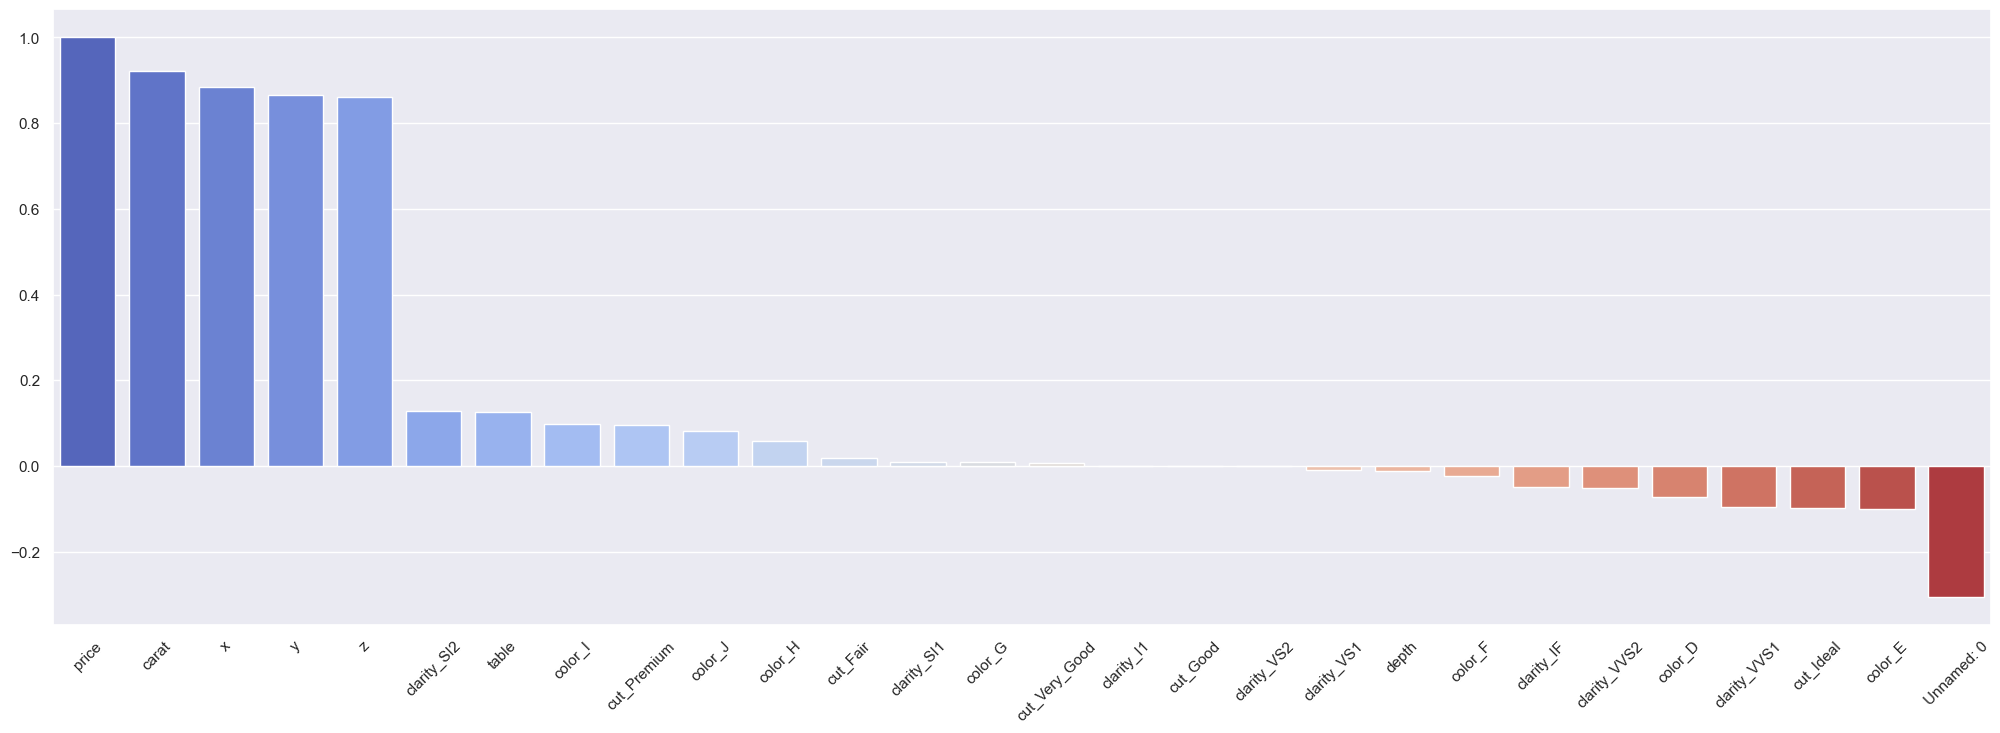

In [152]:
sns.barplot(x=corr_price.index, y=corr_price.values, palette='coolwarm')
sns.set(font_scale=0.05)
sns.set(rc={'figure.figsize':(25,8)})

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


---------------------
### 1.5 A seaborn heatmap of the distribution of correlations between all the variables. 

<AxesSubplot:>

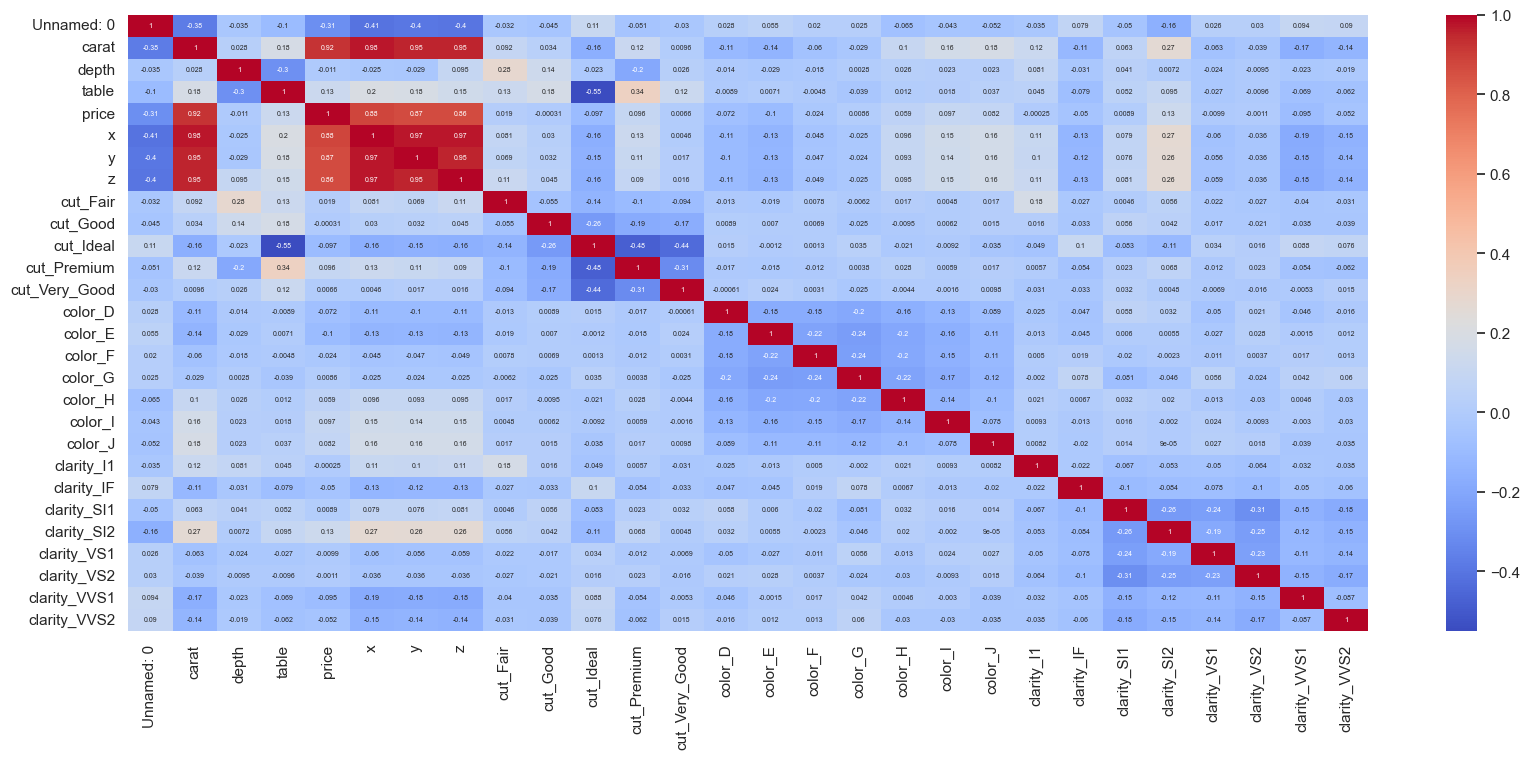

In [48]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize':5})

The larger the table size, the less likely the cut will be ideal and the more likely it will be a Premium cut


---------------------
### 1.6 Three grids showing the change in price per carat for all categorical features (cut, clarity, color)

#### 1.6.1 **CUT**

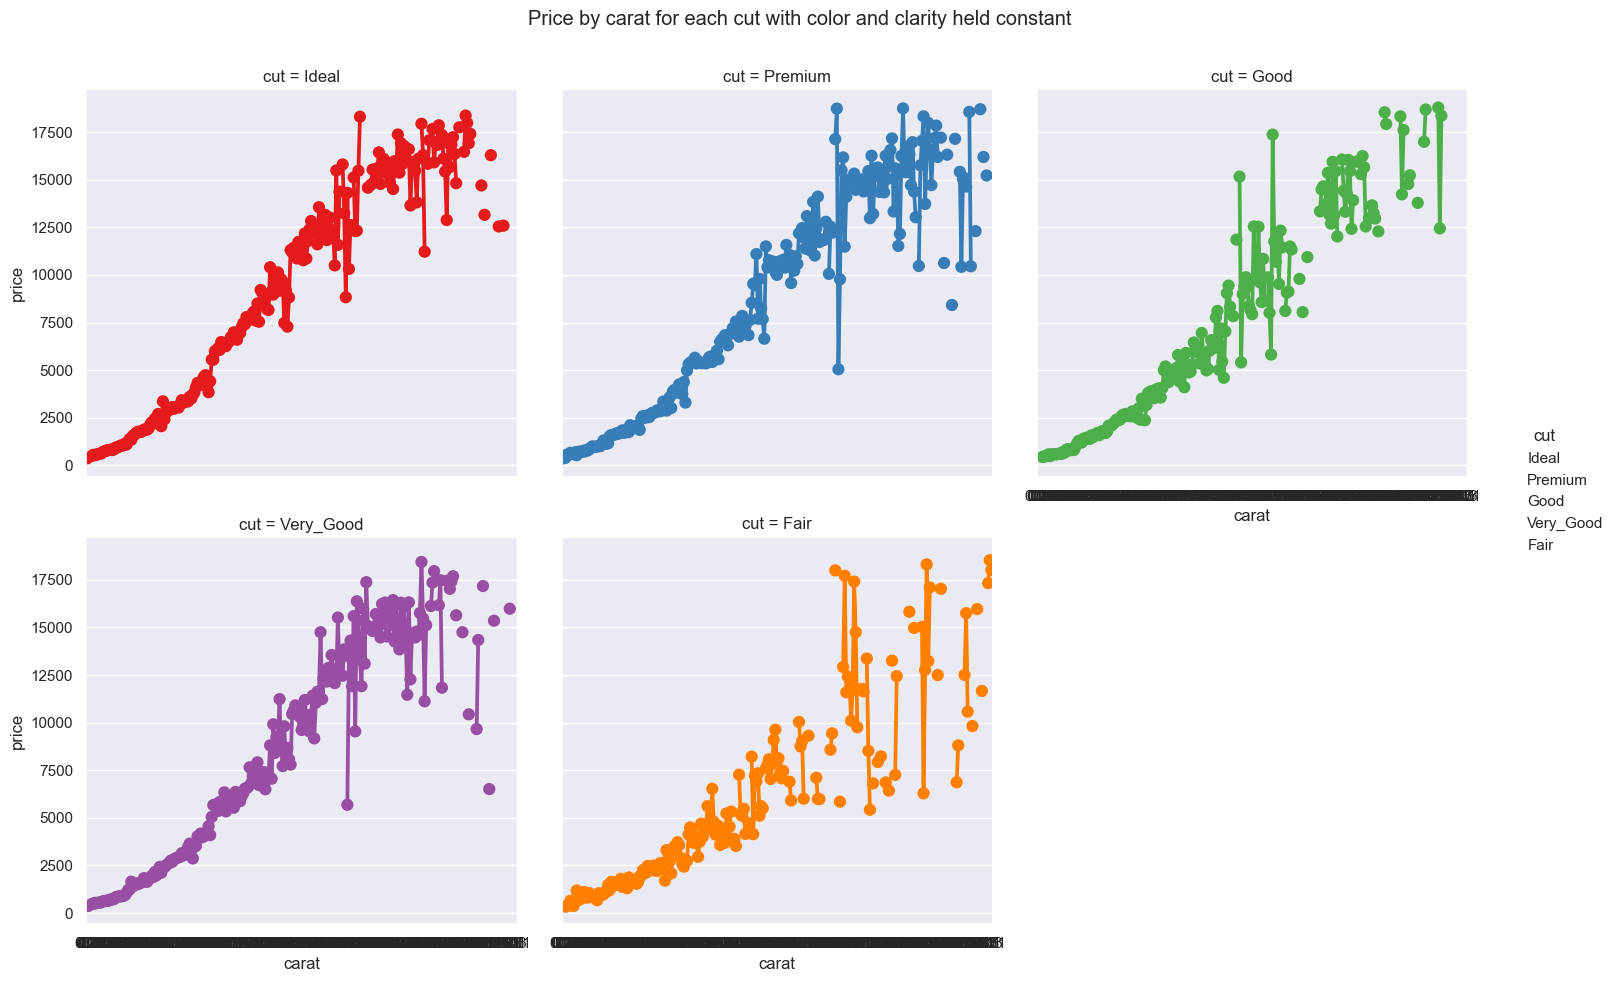

In [153]:
constant_vars = ['color', 'clarity']

# Create a FacetGrid with color and clarity held constant
g = sns.FacetGrid(dia, col='cut', hue='cut', col_wrap=3, height=5, palette='Set1', margin_titles=True)
g.map(sns.pointplot, 'carat', 'price', order=sorted(dia['carat'].unique()), ci=None)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price by carat for each cut with color and clarity held constant')
plt.show()

Carat seems to show a lot of variability even when color and clarity are held constant. This could be due to two reasons:
- The dimensions (x,y,z) of the diamonds create a long or flat shape, leading to a change in price
- The table size can vary, leading to a more asthetic diamond

#### 1.6.2 **CLARITY**

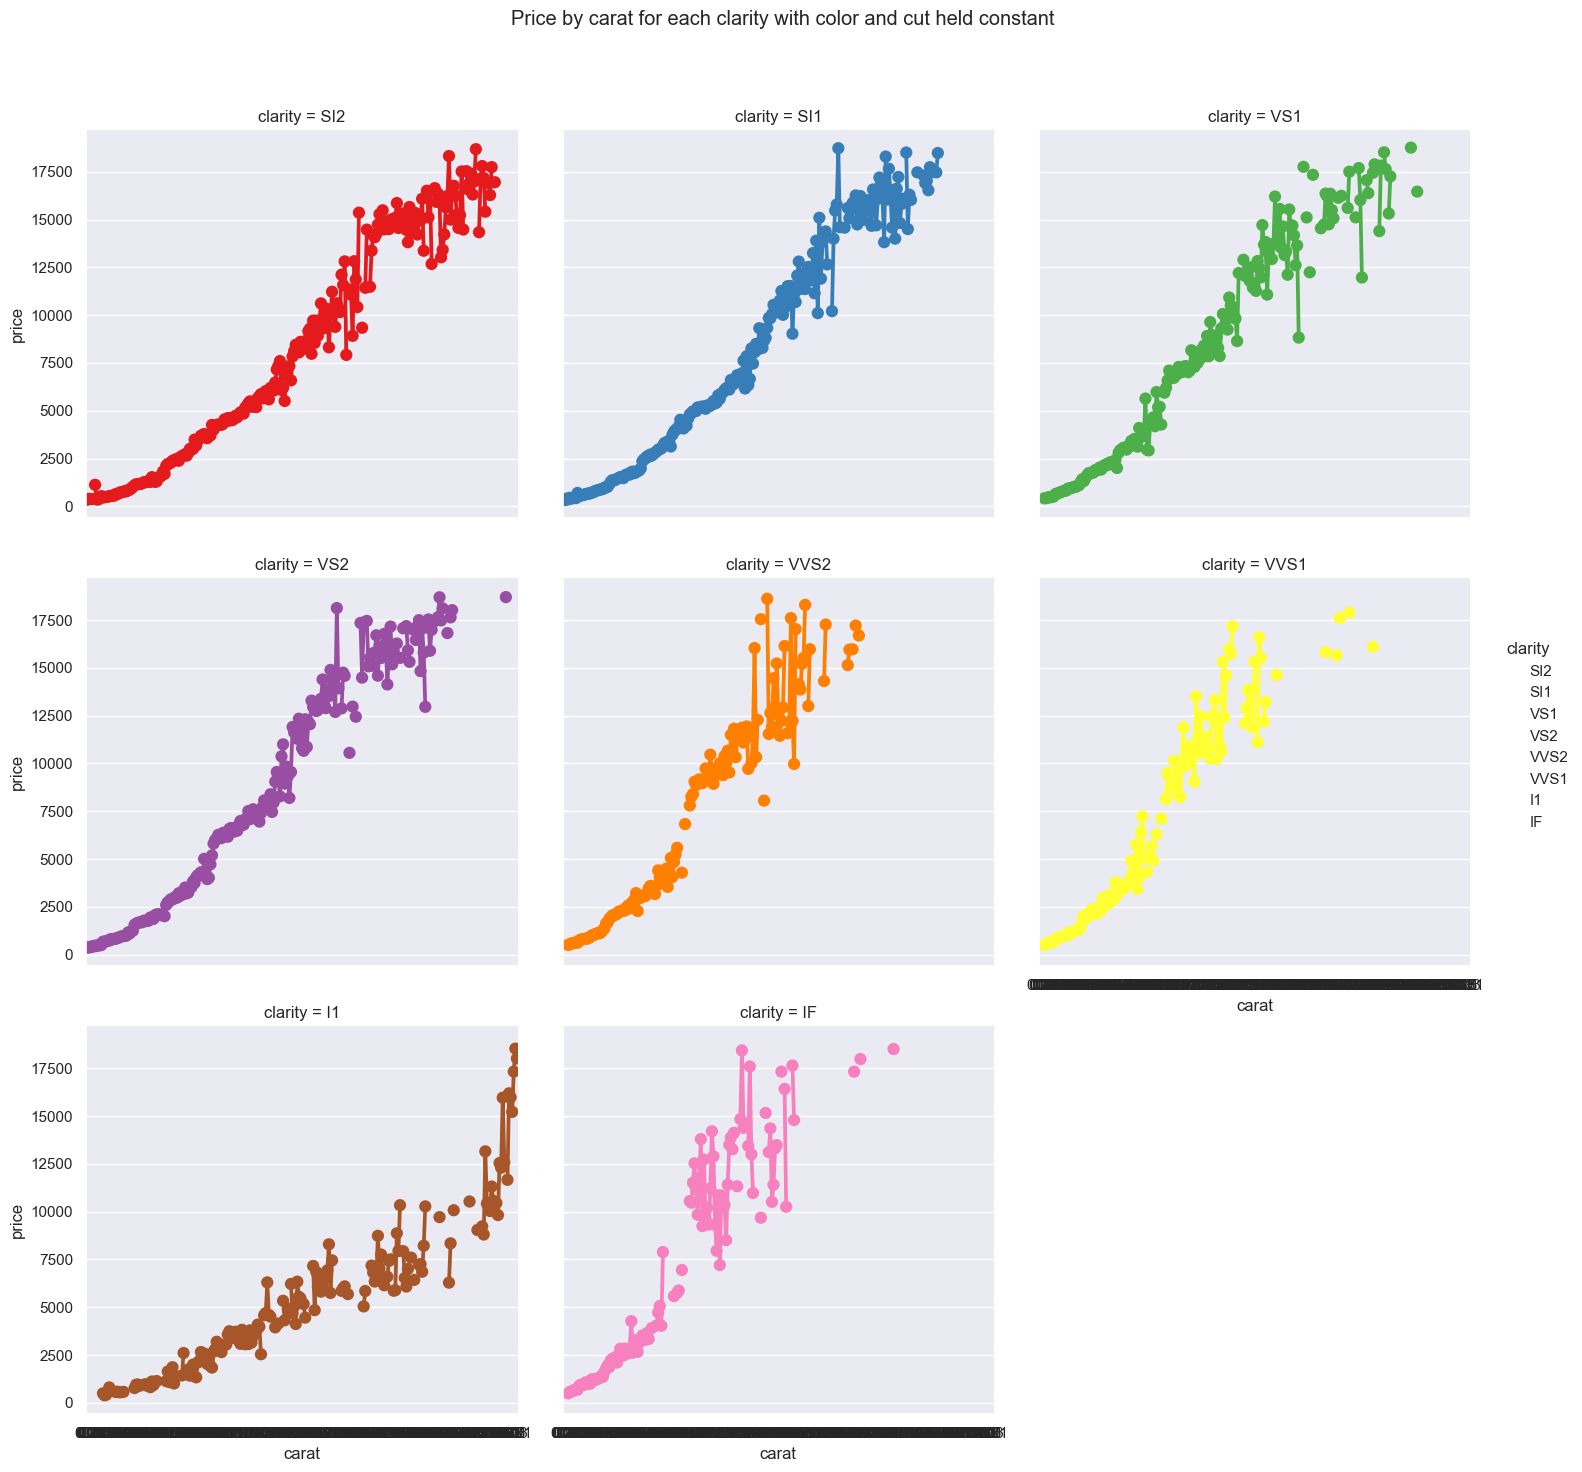

In [154]:
constant_vars = ['color', 'cut']

# Create a FacetGrid with color and clarity held constant
g = sns.FacetGrid(dia, col='clarity', hue='clarity', col_wrap=3, height=5, palette='Set1', margin_titles=True)
g.map(sns.pointplot, 'carat', 'price', order=sorted(dia['carat'].unique()), ci=None)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price by carat for each clarity with color and cut held constant')
plt.show()

There seems to be less variation than with carat, however we can see the that IF has the steepest regression, whereas I1 has the flattest regression. It is also important to note that IF has the fewest data points since it is the best clarity a diamond can offer. 

#### 1.6.3 **COLOR**

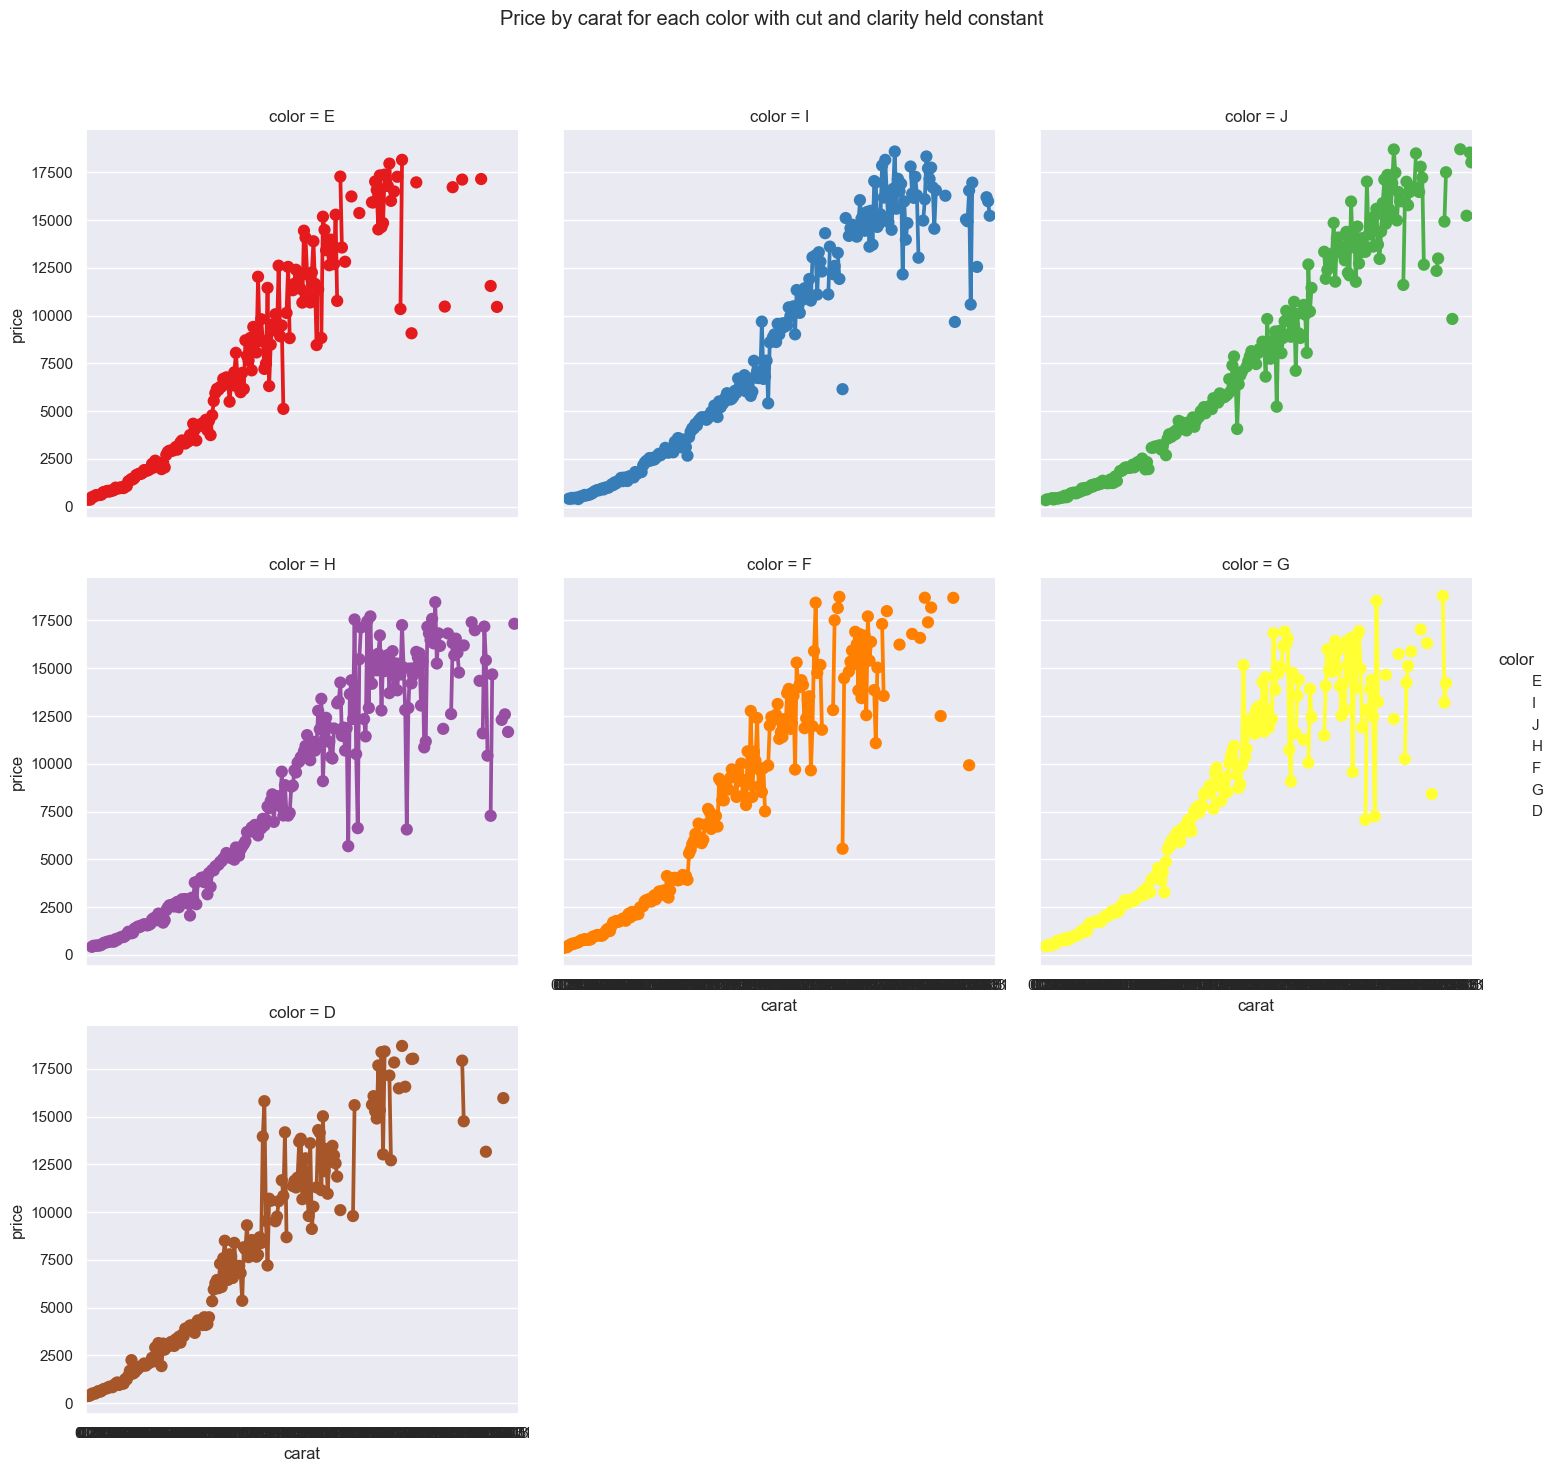

In [156]:
constant_vars = ['cut', 'clarity']

# Create a FacetGrid with color and clarity held constant
g = sns.FacetGrid(dia, col='color', hue='color', col_wrap=3, height=5, palette='Set1', margin_titles=True)
g.map(sns.pointplot, 'carat', 'price', order=sorted(dia['carat'].unique()), ci=None)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price by carat for each color with cut and clarity held constant')
plt.show()

There seems to be the most variability in price with colour out of all three variables tested. The steepest curve being for the color being D. Out of all the colours, J has the most consistent pricing when it is the worst color grading. 

This can tell us that **a bad colour grading will always depreciate the value of a stone, however, a good colour alone cannot not define the price of the same stone**.

---------------------

# 2. A Multivariate Analysis

Creating a multivariate analysis and a Machine Learning model to predict the price of diamonds

---------------------
## 2.1 Linear Regression Analysis

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

cols = ['carat', 'cut', 'color', 'clarity']

X= dia[cols]

# Create a new Series with the target variable (price)
y = dia['price']

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Fit and transform the categorical variables
X_encoded = encoder.fit_transform(X[['cut', 'color', 'clarity']])

# Merge the one-hot encoded variables with the continuous variables
X_final = pd.concat([X[['carat']], pd.DataFrame(X_encoded.toarray())], axis=1)

# Create a new instance of the LinearRegression class
model = LinearRegression()

# Fit the model using the X_final and y data
reg=model.fit(X_final, y)

# Print the coefficients for each feature
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

/Users/sagarsaccount/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Intercept: 3127392478463738.0
Coefficients: [ 8.90341283e+03 -3.62486360e+14 -3.62486360e+14 -3.62486360e+14
 -3.62486360e+14 -3.62486360e+14 -3.84223542e+14 -3.84223542e+14
 -3.84223542e+14 -3.84223542e+14 -3.84223542e+14 -3.84223542e+14
 -3.84223542e+14 -2.38068258e+15 -2.38068258e+15 -2.38068258e+15
 -2.38068258e+15 -2.38068258e+15 -2.38068258e+15 -2.38068258e+15
 -2.38068258e+15]


#### 2.1.1 Residuals Density Plot

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.095e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        11:07:11   Log-Likelihood:            -4.5699e+05
No. Observations:               53943   AIC:                         9.140e+05
Df Residuals:                   53923   BIC:                         9.142e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1798.8660    107.338    -16.759

Text(0.5, 1.0, 'residuals density plot')

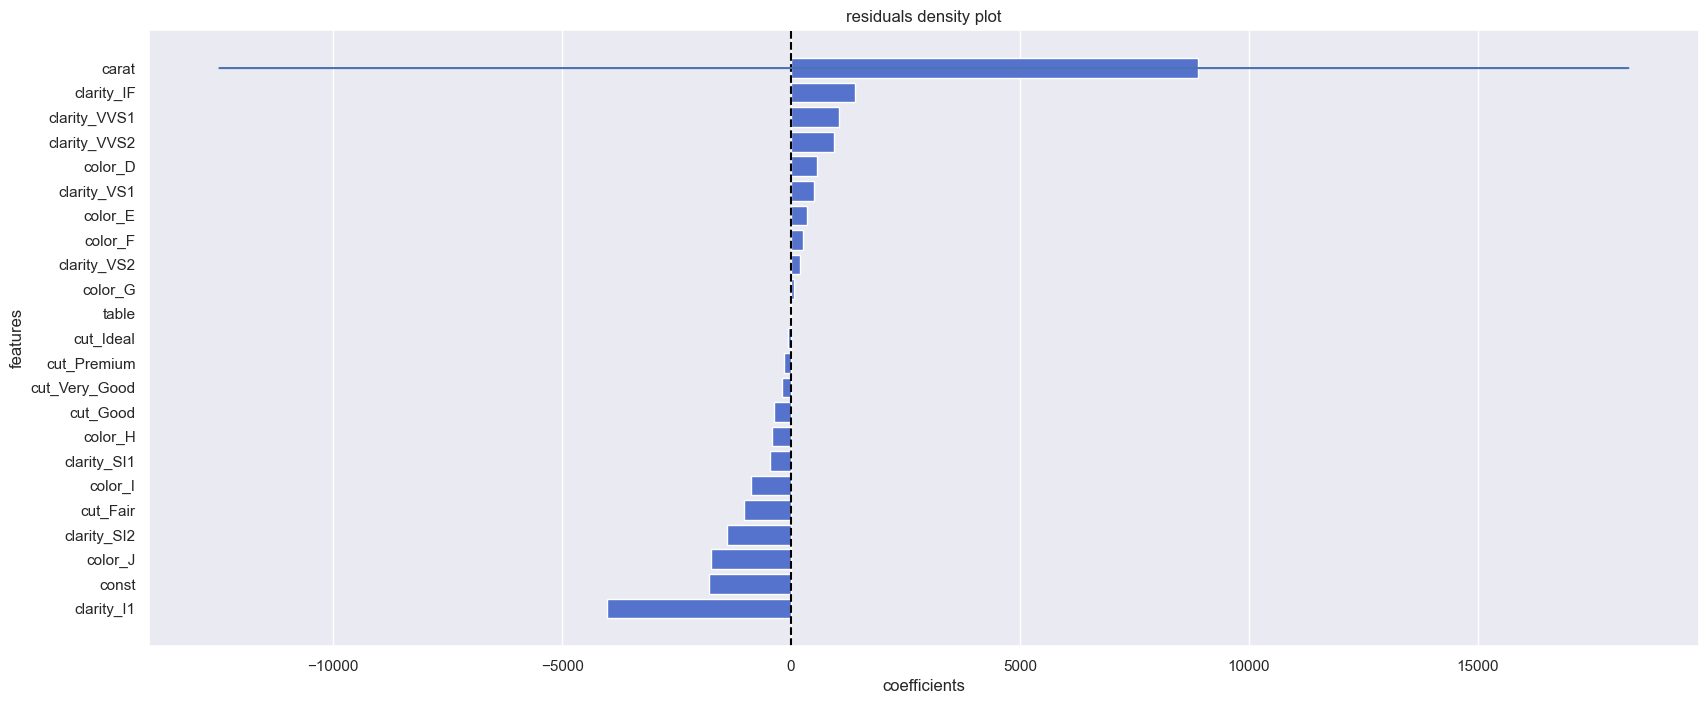

In [99]:
import statsmodels.api as sm

# Load the dataset
diamonds=dia

# One-hot-encode the categorical variables
diamonds = pd.get_dummies(dia, columns=['cut','color','clarity'])

# Create a dataframe with the predictor variables
X = diamonds.drop(['Unnamed: 0', 'price','x','y','z','depth'], axis=1)

# Add a constant term to the predictor variables for the intercept
X = sm.add_constant(X)

# Create a series with the target variable
y = diamonds['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Plot the correlation coefficients
coef_df = pd.DataFrame({'features': X.columns, 'coefficients': model.params}).sort_values(by='coefficients', ascending=False)
sns.barplot(x='coefficients', y='features', data=coef_df, color='royalblue')
plt.axvline(x=0, color='black', ls='--')

sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

## What can we tell from the data above?
#### - The coefficient of each independent variable is the amount by which the target variable is expected to change when that independent variable increases by one unit, while holding all other independent variables constant.
#### - We can see that **carat** is easily the most influential variable on price
#### - We can also see that unless the **clarity** is not IF, it has a **negative** effect on price. 
#### - Having a clarity of *SI1, SI2, or I1* has a large **depreciating factor** regardless of the cut or color.
#### - When a diamond is described to have the **color J**, it is most often depreciated in value to some extent


## Variables That Increase the Price (Order of Importance Based on Data):
1. #### Carat
2. #### Color
3. #### Cut
4. #### Clarity (Significantly decreases price if not IF)

In [89]:
df=model.params
dia_df=pd.DataFrame(df, columns=['coefficient'])
dia_df.head(2)

dia_df2=pd.DataFrame(df,columns=['coefficient'])
DF_pos=dia_df[dia_df['coefficient']>0]
DF_pos.sort_values(by='coefficient',ascending=False)

DF_pos.sort_values(by='coefficient',ascending=False)


,coefficient
carat,8893.591586
clarity_IF,1391.753518
clarity_VVS1,1045.859014
clarity_VVS2,940.909729
color_D,567.594607
clarity_VS1,508.921881
color_E,356.726250
color_F,263.442806
clarity_VS2,191.799647
color_G,58.973154


In [90]:
DF_neg=dia_df[dia_df['coefficient']<0]
DF_neg.sort_values(by='coefficient', ascending=True)

,coefficient
clarity_I1,-4026.540788
const,-1798.865968
color_J,-1758.603912
clarity_SI2,-1399.323879
cut_Fair,-1017.475389
color_I,-873.879107
clarity_SI1,-452.245090
color_H,-413.119766
cut_Good,-367.081047
cut_Very_Good,-187.499266


### 2.1.2 KDE Plot of the Residuals

Text(0.5, 1.0, 'distribution of predicted and actual values')

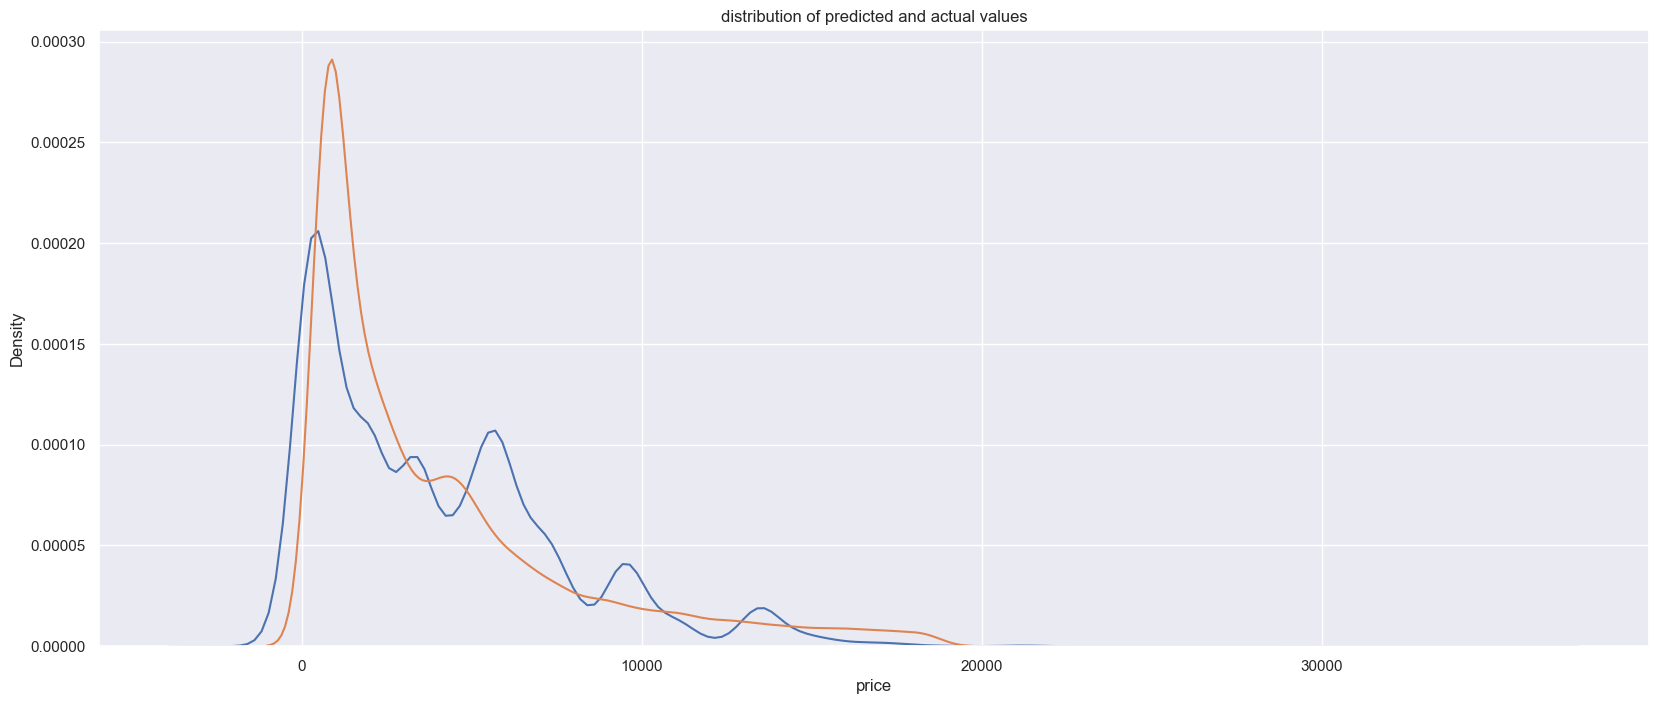

In [92]:
# Distrubution of Review Score vs Predicted Review Score

sns.kdeplot(predicted_price, label='predicted review score')
sns.kdeplot(dia.price, label = 'actual review score')
plt.title('distribution of predicted and actual values')

---------------------
## 2.2 Improving our R-Squared Value + Prediction Model
### 2.2.1 Preprocessing for the Machine Learning Prediction Algorithm 

As we can see, our R-squared value is 0.91, which is good, but still low. We should look into methods to increase this value to at least see an improvement, if not 0.95. To do this we will follow this process:
1. Logarithmic Normalization of the price
2. Standard Scalar Normalization
3. One-Hot-Encoding Categorical Features
4. Lasso Regression & Random Forest Regression

The **ORDER** in which we do both the logarithmic transformation and standard scalar transformation is important. 

**Log transformation followed by standard scalar normalization**:
- Apply standard scalar normalization to the transformed data, resulting in a new set of values with a mean of 0 and a standard deviation of 1.
- This combination of transformations can be useful when the data has a skewed distribution and you want to both normalize the scale and mitigate the skewness. It can also be beneficial for certain algorithms that assume normally distributed data.

**Standard scalar normalization followed by log transformation**:
- Perform a log transformation on the standardized data, replacing each data point with its logarithmic value.
- This combination of transformations can be useful when you want to both standardize the scale of the data and further compress the range of values. It can be beneficial when dealing with highly variable data or when the logarithmic scale is more appropriate for the analysis.

Since our **'price'** column is highly skewed and has plenty of outliers, we will start with the Log transformation, followed by the standard scalar onto all of the other features. 

In [105]:
# Load the data into a DataFrame
data = dia

# Separate the features (X) and target variable (y)
X = data.drop("price", axis=1)
y = np.log1p(data["price"]*137)  # Apply log transformation to the target variable

# Perform one-hot encoding on categorical variables
categorical_cols = ['cut', 'color', 'clarity']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Data Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust the alpha value based on your data
kf = KFold(n_splits=5, shuffle=True)
lasso_scores = cross_val_score(lasso, X_normalized, y, cv=kf, scoring='r2')
mean_lasso_score = lasso_scores.mean()

# Random Forest Regression
random_forest = RandomForestRegressor()
rf_scores = cross_val_score(random_forest, X_normalized, y, cv=kf, scoring='r2')
mean_rf_score = rf_scores.mean()

print("Mean R^2 score for Lasso Regression:", mean_lasso_score)
print("Mean R^2 score for Random Forest Regression:", mean_rf_score)

Mean R^2 score for Lasso Regression: 0.9083146827334634
Mean R^2 score for Random Forest Regression: 0.9991485640124637


As we can see, the Lasso Regression improved the R-Square score, however the Random Forest Regression has shown to be our best bet. By standardizing and normalizing the data, we greatly reduced the rmse! 

We will continue with the Random Forest Regression for our ML predictions

In [108]:
# Load the data into a DataFrame
data = dia

# Separate the features (X) and target variable (y)
X = data.drop("price", axis=1)
y = np.log1p(data["price"]*137)  # Apply log transformation to the target variable and convert it to yen

# Perform one-hot encoding on categorical variables
categorical_cols = ['cut', 'color', 'clarity']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Data Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Create a pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [500],
    'regressor__max_depth': [20]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

print("Best R^2 score (cross-validation):", best_score)
print("R^2 score on the test set:", test_score)

Best R^2 score (cross-validation): 0.9987303928349928
R^2 score on the test set: 0.9990610223192037


The code above:
- The dataset is split into training and test sets usintrain_test_split() with a test size of 0.3 and a random state of 42.
- A pipeline is created with a preprocessing step (standardizationusing StandardScaler() and a modeling step using RandomForestRegress().
- The parameter grid for the grid search is defined with the desirevalues for n_estimators and max_depth.
- Grid search is performed using GridSearchCV() with 5-folcross-validation and the specified scoring metric ('r2').
- The best model and its cross-validated score are obtained from thgrid search results.
- Finally, the best model is evaluated on the test set, and the R^scores are printed


An R-squared score of 0.999 is an almost perfect fit, however we have to be careful of overfitting if more data is added. Therefore, we will compare it with GIA prices from another year. 

---------------------

## 2.3 Inputting new data from the GIA
#### The Geological Institute of America is one of the most well renowned diamond assessment companies, giving certificates of verification of each stone and even colour stones. Their certificate alone can increase the value of the diamond due to the reportoire it has. 

In [131]:

# Define the data
data = [
    [0.30, 'Ideal', 'J', 'VS2', 57.00, 62.40, 4.23, 4.29, 2.66, '401'],
    [1.20, 'Ideal', 'I', 'SI1', 58.00, 62.30, 6.73, 6.79, 4.21, '6098'],
    [0.83, 'Ideal', 'G', 'SI2', 55.00, 63.00, 5.95, 5.98, 3.76, '2074'],
    [1.72, 'Very_Good', 'H', 'SI1', 63.00, 59.00, 7.79, 7.82, 4.61, '16978'],
    [2.01, 'Ideal', 'E', 'SI1', 58.00, 62.30, 8.01, 8.06, 5.01, '19750'],
    [3.00, 'Ideal', 'I', 'VS2', 61.00, 58.80, 9.43, 9.47, 5.55, '49386'],
    [3.52, 'Ideal', 'H', 'VVS2', 62.00, 58.30, 10, 10.05, 5.84, '83867']
]
columns = ['Carat', 'Cut', 'Color', 'Clarity', 'Table', 'Depth', 'x', 'y', 'z', 'Price']

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=columns)

# Preprocess the input data
categorical_cols = ['Cut', 'Color', 'Clarity']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded['Price'] = df_encoded['Price'].str.replace(',', '').str.replace('$', '').astype(float)

# Separate the features (X) and target variable (y)
X = df_encoded.drop("Price", axis=1)
y = np.log1p(df_encoded["Price"]*137)

# Load the trained model and perform the necessary preprocessing
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Load the trained model
model = RandomForestRegressor(n_estimators=500, max_depth=20)
model.fit(X_normalized, y)

# Make predictions on the input data
X_pred = scaler.transform(X)
y_pred = model.predict(X_pred)
y_pred_log = np.expm1(y_pred)  # Convert back from logarithmic scale

# Add the predicted prices to the DataFrame
df['Predicted_Price'] = y_pred_log

df.head(2)

/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_39746/2738646926.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_encoded['Price'] = df_encoded['Price'].str.replace(',', '').str.replace('$', '').astype(float)


,Carat,Cut,Color,Clarity,Table,Depth,x,y,z,Price,Predicted_Price
0,0.3,Ideal,J,VS2,57.0,62.4,4.23,4.29,2.66,401,127643.213861
1,1.2,Ideal,I,SI1,58.0,62.3,6.73,6.79,4.21,6098,799505.139905


In [132]:
# Define the original prices and predicted prices as numpy arrays
original_prices = np.array([401*137, 6098*137, 2074*137, 16978*137, 19750*137, 49386*137, 83867*137])
predicted_prices = np.array([1.504385e+05,  
8.375388e+05,  
3.385628e+05,  
2.468050e+06,  
2.097946e+06,  
6.171052e+06,  
8.472920e+06])

# Calculate the mean squared error
mse = mean_squared_error(original_prices, predicted_prices)

print("Mean Squared Error:", mse)

Mean Squared Error: 1408136556653.4473


## As we can clearly see, the MSE is extremely large, indicating that our model is definitely overfitting. There are multiple reasons for this:
### 1. 📈 Diamonds have fluctuations in price over short periods of time and can be highly volatile, having different prices based on the year and economic outlook. 
### 2. 🌍 The diamond market can be heavily influenced externally through things like recessions, wars, inflation, etc. 
### 3. ⚖️ Demand and supply of diamonds heavily dictate the price in B2B, however B2C remains slight. 
### 4. 📊 There is not set price for diamonds. This is completely dependant on the seller and each buyer values each diamond differnelty. Essentially diamonds are valued by the seller and buyer during the exchange.

#### 💎 This makes it extremely difficult to create a successful model without more data on consumer market, buyer psychology, and even economic outlook. More data is needed to create a better functioning model. 

---------------------

However, to reduce overfitting and if I had the CPU for it, I would use the following code:

In [ ]:
data=dia

# Separate the features (X) and target variable (y)
X = data.drop("price", axis=1)
y = np.log1p(data["price"] * 137)  # Apply log transformation to the target variable and convert it to yen

# Perform one-hot encoding on categorical variables
categorical_cols = ['cut', 'color', 'clarity']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Data Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Create a pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 500],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 3],
    'regressor__max_features': ['sqrt', 'log2']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

print("Best R^2 score (cross-validation):", best_score)
print("R^2 score on the test set:", test_score)